# Importing all required libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [24]:
customer = pd.read_csv('Mall_Customers.csv')

In [25]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Summary statistics

In [26]:
customer.info()
customer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              199 non-null    int64 
 1   Gender                  199 non-null    object
 2   Age                     199 non-null    int64 
 3   Annual Income (k$)      199 non-null    int64 
 4   Spending Score (1-100)  199 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,199.000000,199.000000,199.000000,199.000000
mean,100.000000,38.894472,60.175879,50.035176
std,57.590508,13.990037,25.761615,25.782967
min,1.000000,18.000000,15.000000,1.000000
25%,50.500000,28.500000,41.000000,34.500000
50%,100.000000,36.000000,61.000000,50.000000
75%,149.500000,49.000000,78.000000,72.500000
max,199.000000,70.000000,137.000000,99.000000


# Data Preprocessing

In [27]:
customer.shape

(199, 5)

In [28]:
customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
customer.duplicated().sum()

np.int64(0)

No duplicate or null values present in the dataset.

# Exploratory Data Analysis

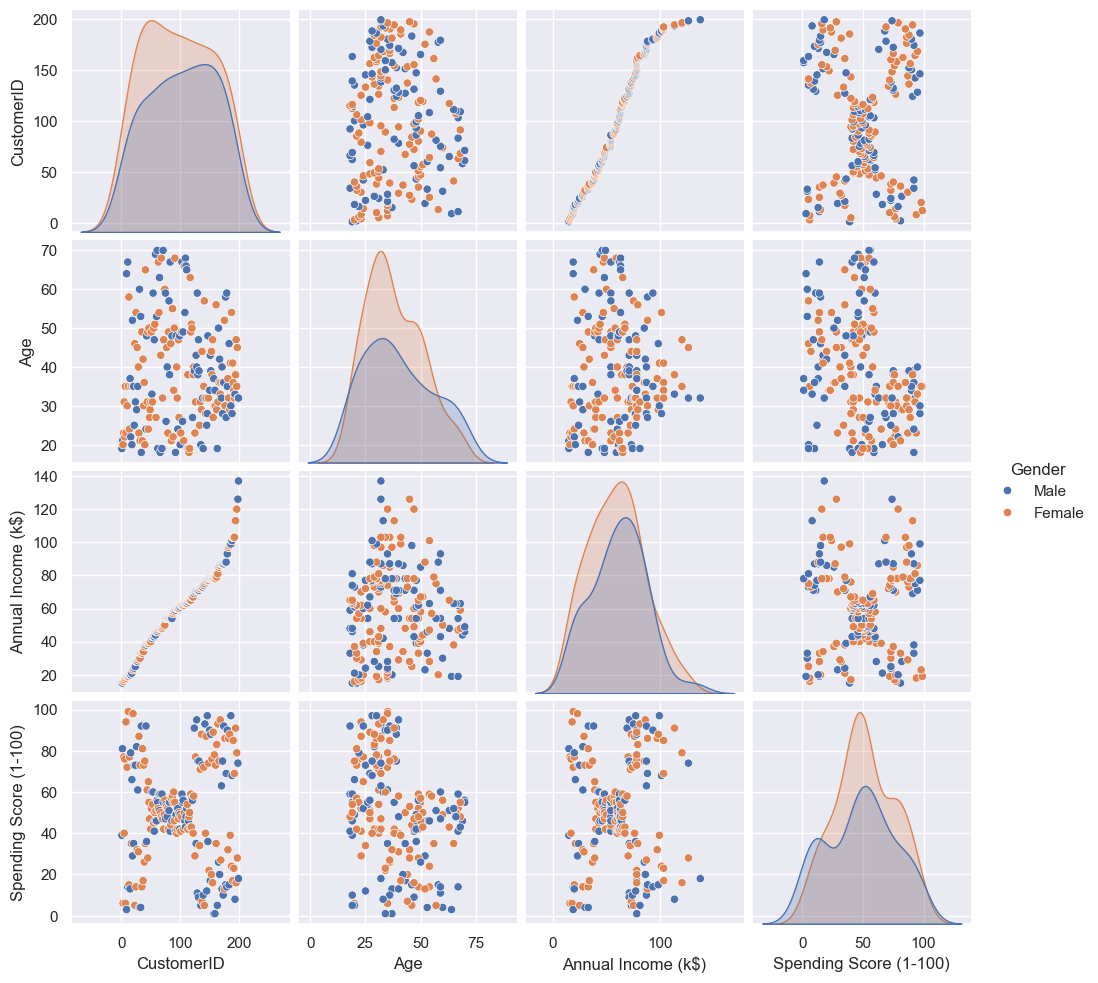

In [30]:
sns.set()
sns.pairplot(customer, hue='Gender')
plt.show()

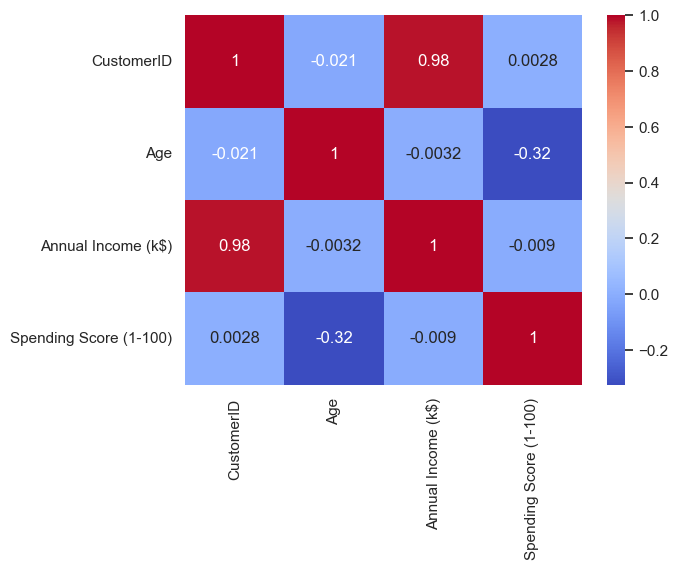

In [37]:
# Calculate correlation excluding Gender column
corr = customer.drop('Gender', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



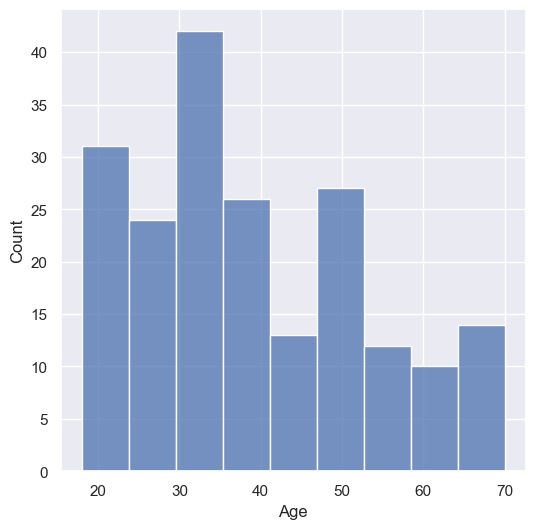

In [38]:
# Histogram showing the distribution of ages
plt.figure(figsize=(6,6))
sns.histplot(customer['Age'])
plt.show()

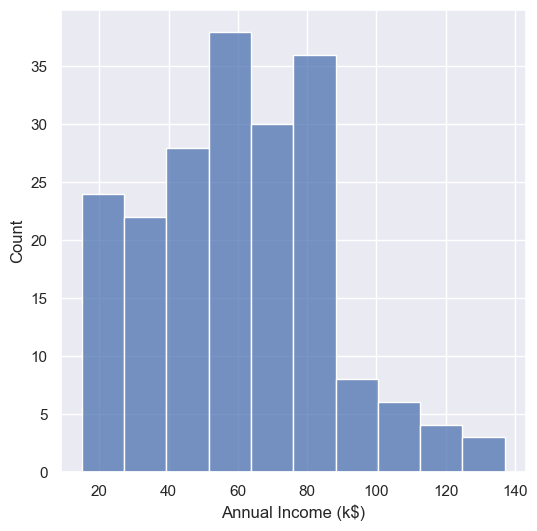

In [40]:
# Histogram showing the distribution of ages
plt.figure(figsize=(6,6))
sns.histplot(customer['Annual Income (k$)'])
plt.show()

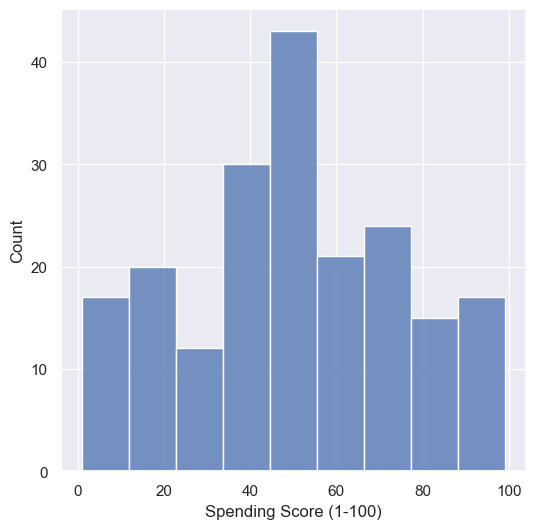

In [41]:
# Histogram showing the distribution of ages
plt.figure(figsize=(6,6))
sns.histplot(customer['Spending Score (1-100)'])
plt.show()

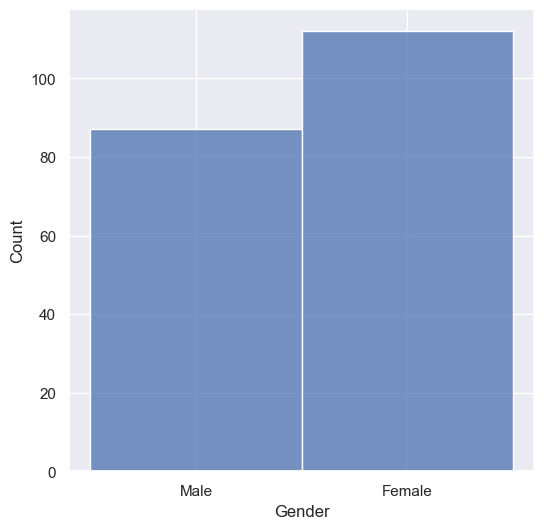

In [42]:
# Histogram showing the distribution of ages
plt.figure(figsize=(6,6))
sns.histplot(customer['Gender'])
plt.show()

# Splitting the data

In [46]:
x = customer.iloc[:, [3,4]]
print(x)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
194                 120                      16
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18

[199 rows x 2 columns]


In [50]:
wcss = []

for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(x)

    wcss.append(k_means.inertia_)

In [51]:
print(wcss)

[263027.59798994975, 182193.77519379847, 103734.21651690202, 71266.4884172628, 69507.33292053665, 40070.67932459025, 34620.85388186375, 24124.367318281475, 20928.36007493046, 19876.524809229973]


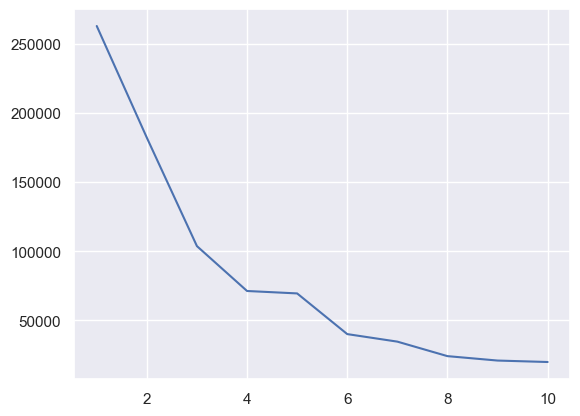

In [52]:
plt.plot(range(1,11), wcss)
plt.show()

# Training the K-Means Clustering Model

In [53]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
y = kmeans.fit_predict(x)

print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


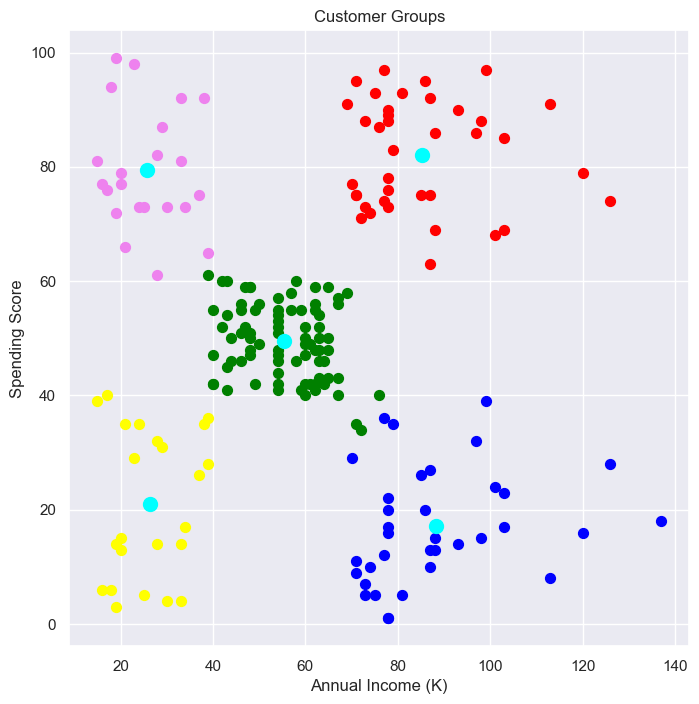

In [57]:
# plotting all the clusters and their Centroids
x_array = x.values
plt.figure(figsize=(8,8))
plt.scatter(x_array[y==0,0], x_array[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x_array[y==1,0], x_array[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x_array[y==2,0], x_array[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x_array[y==3,0], x_array[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x_array[y==4,0], x_array[y==4,1], s=50, c='blue', label='Cluster 5')

# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income (K)')
plt.ylabel('Spending Score')
plt.show()